In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Uploading Data and Droping unnecesary column

In [2]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [3]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.Price = (df.Price / 20).astype('int')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804


In [5]:
df.info()  #There are just 2 numerical columns: 'inches' and 'price euros'.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 107.0+ KB


In [6]:
df.describe().T # there is a 16k laptop

,count,mean,std,min,25%,50%,75%,max
Inches,1303.0,15.017191,1.426304,10.1,14.0,15.6,15.6,18.4
Price,1303.0,2993.004605,1862.152528,463.0,1595.0,2602.0,3963.0,16247.0


## DATA CLEANING

In [7]:
df = df.rename(columns = str.lower)
df.columns

Index(['company', 'typename', 'inches', 'screenresolution', 'cpu', 'ram',
       'memory', 'gpu', 'opsys', 'weight', 'price'],
      dtype='object')

In [8]:
df[df.duplicated()]

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
1274,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,983
1275,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.2kg,1942
1276,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,1222
1277,Acer,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,769
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,500GB HDD,Intel HD Graphics,Windows 10,2.20kg,1009
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.6kg,2394
1280,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series 9410 2.9GHz,6GB,1.0TB Hybrid,AMD Radeon R7 M440,Windows 10,2.04kg,1465
1281,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R5 M430,Linux,2.3kg,2147
1282,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2GB,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17kg,556
1283,Asus,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,4GB,500GB HDD,Nvidia GeForce 920M,Windows 10,2.2kg,1918


In [9]:
df = df.drop_duplicates()
df.shape

(1274, 11)

# Extracting resolution

In [10]:
df["resolution"] = df.screenresolution.str.extract(r"(\d+x\d+)")

In [11]:
df.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531,1920x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759,2880x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804,2560x1600


In [12]:
df['screentype']  = df['screenresolution'].replace(r'(\d+x\d+)','',regex=True)
df.screentype

0               IPS Panel Retina Display 
1                                        
2                                Full HD 
3               IPS Panel Retina Display 
4               IPS Panel Retina Display 
                      ...                
1269                                     
1270     IPS Panel Full HD / Touchscreen 
1271    IPS Panel Quad HD+ / Touchscreen 
1272                                     
1273                                     
Name: screentype, Length: 1274, dtype: object

In [13]:
df.screentype.value_counts()

Full HD                                 505
                                        295
IPS Panel Full HD                       231
IPS Panel Full HD / Touchscreen          51
Full HD / Touchscreen                    47
Touchscreen                              32
IPS Panel Retina Display                 17
Quad HD+ / Touchscreen                   15
IPS Panel Touchscreen                    13
IPS Panel 4K Ultra HD                    12
IPS Panel 4K Ultra HD / Touchscreen      11
IPS Panel                                11
4K Ultra HD / Touchscreen                10
4K Ultra HD                               7
IPS Panel Quad HD+                        5
IPS Panel Quad HD+ / Touchscreen          4
Quad HD+                                  3
IPS Panel Touchscreen / 4K Ultra HD       2
Touchscreen / Quad HD+                    1
Touchscreen / Full HD                     1
Touchscreen / 4K Ultra HD                 1
Name: screentype, dtype: int64

In [14]:
df['touchscreen'] = df['screentype'].str.extract(r'(Touchscreen)')

df['IPS Panel']= df['screentype'].apply(lambda element:1 if 'IPS Panel'in  element else 0)

df.head()

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,resolution,screentype,touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568,2560x1600,IPS Panel Retina Display,NaN,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394,1440x900,,NaN,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531,1920x1080,Full HD,NaN,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759,2880x1800,IPS Panel Retina Display,NaN,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804,2560x1600,IPS Panel Retina Display,NaN,1


In [15]:
df.touchscreen.value_counts()

Touchscreen    188
Name: touchscreen, dtype: int64

In [16]:
df['touchscreen'] = df['touchscreen'].replace('Touchscreen',1)
df['touchscreen'] = df['touchscreen'].replace(np.nan,0)
df['touchscreen'] = df['touchscreen'].astype("int")
df['touchscreen'].value_counts()

0    1086
1     188
Name: touchscreen, dtype: int64

In [17]:
df.drop(["screentype", "screenresolution"], axis = 1, inplace = True)

In [18]:
df.head()

,company,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,touchscreen,IPS Panel
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568,2560x1600,0,1
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394,1440x900,0,0
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531,1920x1080,0,0
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759,2880x1800,0,1
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804,2560x1600,0,1


# Making cpu to integer

In [19]:
df['cpu_freq'] = df['cpu'].str.extract(r'(\d+\.\d+)GHz') 
df['cpu_freq'].value_counts()

2.5     282
2.8     165
2.7     163
1.6     122
2.3      86
1.8      78
2.6      74
1.1      53
2.4      50
2.9      19
2.0      19
1.2      15
1.44     12
2.2      11
1.5      10
1.3       6
3.6       5
2.1       3
3.1       3
2.50      3
0.9       2
1.9       2
1.0       1
3.2       1
1.92      1
1.60      1
2.70      1
Name: cpu_freq, dtype: int64

In [20]:
df["cpu_freq"] = df["cpu_freq"].astype(float)

In [21]:
df['cpu']= df['cpu'].str.replace(r'(\d+\.\d+GHz)', '', regex=True)
df.head()

,company,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,touchscreen,IPS Panel,cpu_freq
0,Apple,Ultrabook,13.3,Intel Core i5,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568,2560x1600,0,1,2.3
1,Apple,Ultrabook,13.3,Intel Core i5,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394,1440x900,0,0,1.8
2,HP,Notebook,15.6,Intel Core i5 7200U,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531,1920x1080,0,0,2.5
3,Apple,Ultrabook,15.4,Intel Core i7,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759,2880x1800,0,1,2.7
4,Apple,Ultrabook,13.3,Intel Core i5,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804,2560x1600,0,1,3.1


# Making Ram column İnteger

In [22]:
df['ram'] = df['ram'].str.replace('GB', '')
df['ram'] = df['ram'].astype(int)

# Separating memory column to memory_1 and memory_2 and making them int

In [23]:
df['memory_1']=df['memory']

In [24]:
df['memory_1'].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [25]:
df['memory_1']=df['memory_1'].str.replace('1.0TB','1TB', regex=True)
df['memory_1']=df['memory_1'].str.replace('1TB','1000GB')
df['memory_1']=df['memory_1'].str.replace('2TB','2000GB')
df['memory_1']=df['memory_1'].str.replace('GB','')
df['memory_1'].value_counts()

256 SSD                         412
1000 HDD                        216
500 HDD                         123
512 SSD                         114
128 SSD +  1000 HDD              94
128 SSD                          74
256 SSD +  1000 HDD              73
32 Flash Storage                 36
2000 HDD                         16
512 SSD +  1000 HDD              14
1000 SSD                         14
64 Flash Storage                 13
256 SSD +  2000 HDD              10
256 Flash Storage                 8
16 Flash Storage                  7
1000 Hybrid                       7
32 SSD                            6
180 SSD                           5
128 Flash Storage                 4
512 SSD +  2000 HDD               3
16 SSD                            3
512 Flash Storage                 2
1000 SSD +  1000 HDD              2
256 SSD +  500 HDD                2
128 SSD +  2000 HDD               2
256 SSD +  256 SSD                2
512 SSD +  256 SSD                1
512 SSD +  512 SSD          

In [26]:
df['memory_2']=df['memory_1'].str.replace(r' ','')
df['memory_2'].value_counts()

256SSD                    412
1000HDD                   216
500HDD                    123
512SSD                    114
128SSD+1000HDD             94
128SSD                     74
256SSD+1000HDD             73
32FlashStorage             36
2000HDD                    16
512SSD+1000HDD             14
1000SSD                    14
64FlashStorage             13
256SSD+2000HDD             10
256FlashStorage             8
16FlashStorage              7
1000Hybrid                  7
32SSD                       6
180SSD                      5
128FlashStorage             4
512SSD+2000HDD              3
16SSD                       3
512FlashStorage             2
1000SSD+1000HDD             2
256SSD+500HDD               2
128SSD+2000HDD              2
256SSD+256SSD               2
512SSD+256SSD               1
512SSD+512SSD               1
64FlashStorage+1000HDD      1
1000HDD+1000HDD             1
32HDD                       1
64SSD                       1
128HDD                      1
240SSD    

In [27]:
split_memory = df.memory_2.str.split("+", expand = True)
split_memory.columns = ["memory_1", "memory_2"]
split_memory

,memory_1,memory_2
0,128SSD,None
1,128FlashStorage,None
2,256SSD,None
3,512SSD,None
4,256SSD,None
...,...,...
1269,500HDD,None
1270,128SSD,None
1271,512SSD,None
1272,64FlashStorage,None


In [28]:
df["memory_1"] = split_memory.memory_1
df["memory_2"] = split_memory.memory_2
df.head()

,company,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,touchscreen,IPS Panel,cpu_freq,memory_1,memory_2
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,3568,2560x1600,0,1,2.3,128SSD,None
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,2394,1440x900,0,0,1.8,128FlashStorage,None
2,HP,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,1531,1920x1080,0,0,2.5,256SSD,None
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,6759,2880x1800,0,1,2.7,512SSD,None
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,4804,2560x1600,0,1,3.1,256SSD,None


In [29]:
df["memory_1"] = df.memory_1.str.extract(r"(\d+)")
df["memory_1"] = df["memory_1"].astype(int)

In [30]:
df["memory_2"] = df.memory_2.str.extract(r"(\d+)")
df["memory_2"] = df["memory_2"].replace(np.nan,0)
df["memory_2"] = df["memory_2"].astype(int)

# Making Kg column integer

In [31]:
df['weight'].str.contains('kg').sum()

1274

In [32]:
df['weight'] = df['weight'].str.replace('kg','').astype(float)

# Cleaning GPU column

In [33]:
df['gpu'] = df['gpu'].str.extract(r'^(\w+)')
df['gpu'].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: gpu, dtype: int64

In [34]:
df[df.gpu == 'ARM']

,company,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,touchscreen,IPS Panel,cpu_freq,memory_1,memory_2
1191,Samsung,2 in 1 Convertible,12.3,Samsung Cortex A72&A53,4,32GB Flash Storage,ARM,Chrome OS,1.15,1755,2400x1600,1,1,2.0,32,0


In [35]:
df = df.drop(1191)

# Making resolution column integer

In [36]:
split_values = df.resolution.str.split("x", expand = True)
split_values.columns = ["resolution_1", 'resolution_2']
df["resolution_1"] = split_values.resolution_1.astype(int)
df["resolution_2"] = split_values.resolution_2.astype(int)

In [37]:
df.head()

,company,typename,inches,cpu,ram,memory,gpu,opsys,weight,price,resolution,touchscreen,IPS Panel,cpu_freq,memory_1,memory_2,resolution_1,resolution_2
0,Apple,Ultrabook,13.3,Intel Core i5,8,128GB SSD,Intel,macOS,1.37,3568,2560x1600,0,1,2.3,128,0,2560,1600
1,Apple,Ultrabook,13.3,Intel Core i5,8,128GB Flash Storage,Intel,macOS,1.34,2394,1440x900,0,0,1.8,128,0,1440,900
2,HP,Notebook,15.6,Intel Core i5 7200U,8,256GB SSD,Intel,No OS,1.86,1531,1920x1080,0,0,2.5,256,0,1920,1080
3,Apple,Ultrabook,15.4,Intel Core i7,16,512GB SSD,AMD,macOS,1.83,6759,2880x1800,0,1,2.7,512,0,2880,1800
4,Apple,Ultrabook,13.3,Intel Core i5,8,256GB SSD,Intel,macOS,1.37,4804,2560x1600,0,1,3.1,256,0,2560,1600


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 1273
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       1273 non-null   object 
 1   typename      1273 non-null   object 
 2   inches        1273 non-null   float64
 3   cpu           1273 non-null   object 
 4   ram           1273 non-null   int32  
 5   memory        1273 non-null   object 
 6   gpu           1273 non-null   object 
 7   opsys         1273 non-null   object 
 8   weight        1273 non-null   float64
 9   price         1273 non-null   int32  
 10  resolution    1273 non-null   object 
 11  touchscreen   1273 non-null   int32  
 12  IPS Panel     1273 non-null   int64  
 13  cpu_freq      1187 non-null   float64
 14  memory_1      1273 non-null   int32  
 15  memory_2      1273 non-null   int32  
 16  resolution_1  1273 non-null   int32  
 17  resolution_2  1273 non-null   int32  
dtypes: float64(3), int32(7), int

# EDA

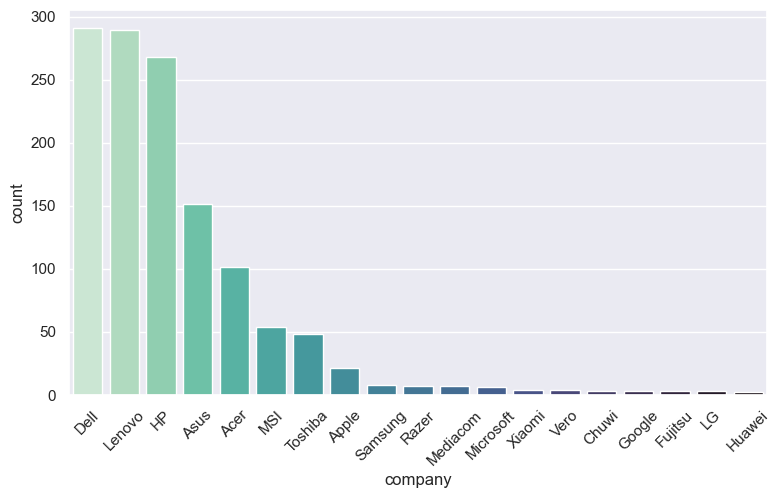

In [39]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.countplot(x='company', data=df, palette='mako_r', 
              order = df['company'].value_counts().index)
plt.xticks(rotation=45);

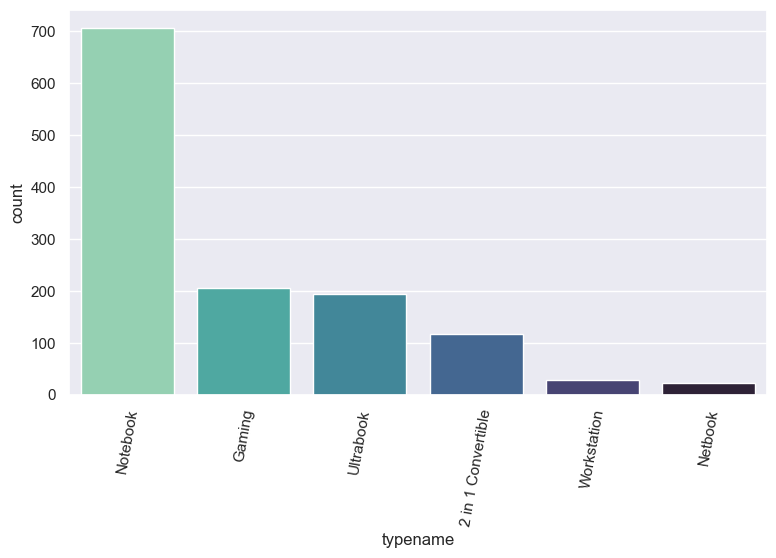

In [40]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.countplot(x='typename', data=df, palette='mako_r', 
              order = df['typename'].value_counts().index)
plt.xticks(rotation=80);

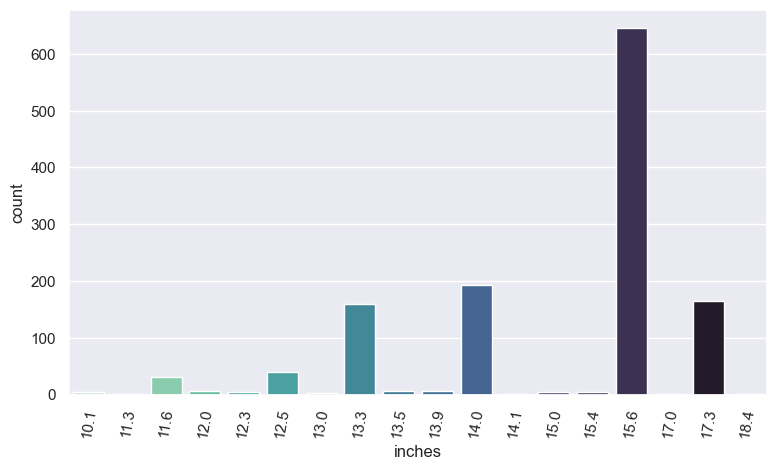

In [41]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.countplot(x='inches', data=df, palette='mako_r', 
              order = df.inches.value_counts().sort_index().index)
plt.xticks(rotation=80);

In [42]:
inches_list = df['inches'].value_counts().index[:5].tolist()
inches_list

[15.6, 14.0, 17.3, 13.3, 12.5]

In [43]:
top5inches = df[df.inches.isin(inches_list)]
top5inches.inches.value_counts()

15.6    646
14.0    193
17.3    164
13.3    160
12.5     39
Name: inches, dtype: int64

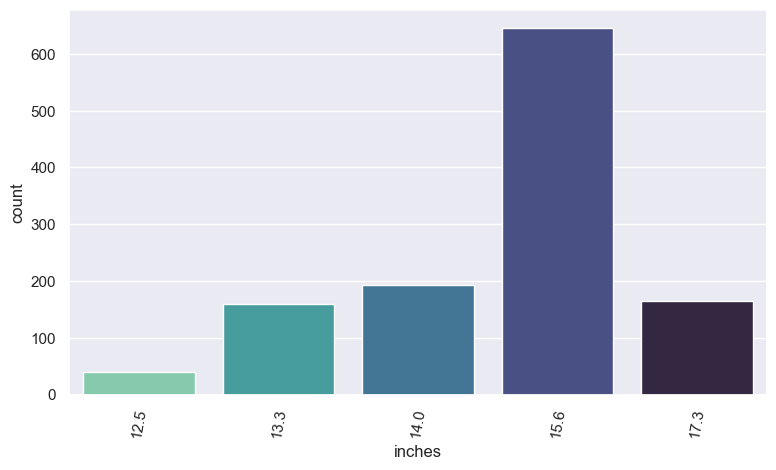

In [44]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.countplot(x='inches', data = top5inches, palette='mako_r', 
              order = top5inches.inches.value_counts().sort_index().index)
plt.xticks(rotation=80);

In [45]:
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,5),gridspec_kw={"height_ratios": (.2, .8)})
    ax[0].set_title(title,fontsize=18)
    sns.boxplot(x=col, data=df, ax=ax[0])
    ax[0].set(yticks=[])
    sns.histplot(x=col, data=df, ax=ax[1])
    ax[1].set_xlabel(col, fontsize=16)
    plt.axvline(df[col].mean(), color='darkgreen', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color='red', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color='purple', linewidth=2.2, label='mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=17, fancybox=True, shadow=True, frameon=True)
    plt.tight_layout()
    plt.show()

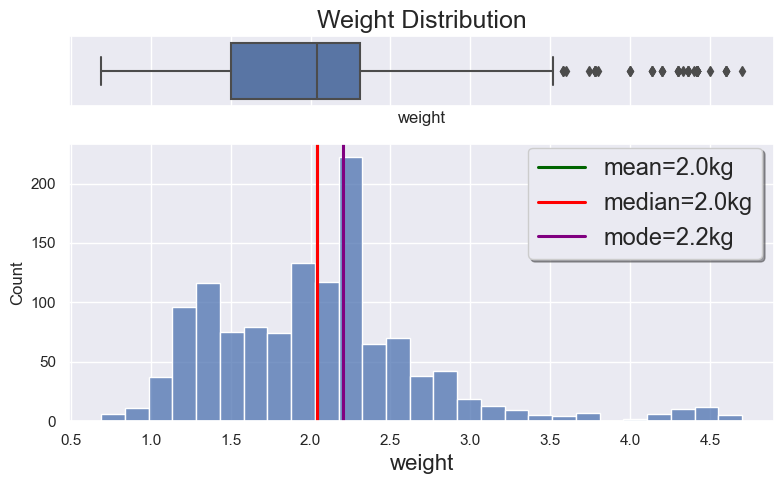

In [46]:
num_plot(df, 'weight', 'Weight Distribution','kg')


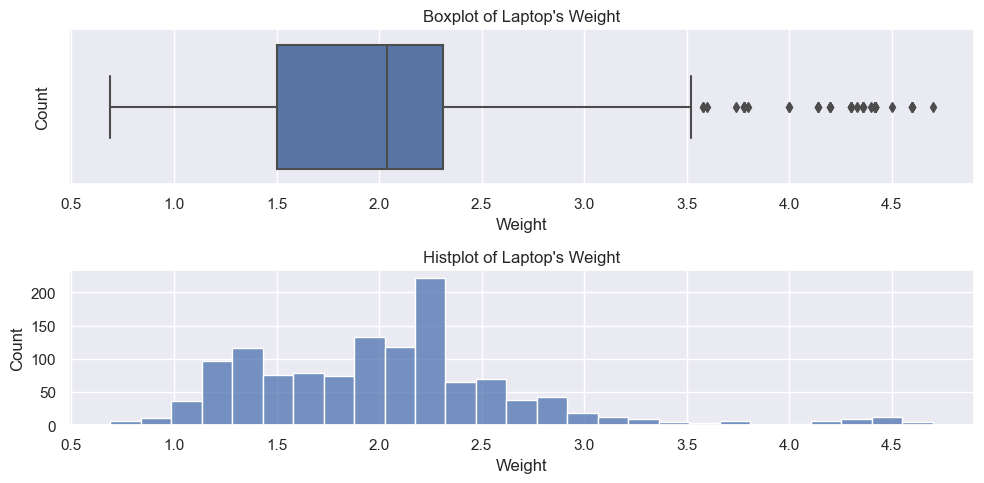

In [47]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

sns.boxplot(x="weight", data=df, ax = ax1)
ax1.set_title("Boxplot of Laptop's Weight")
ax1.set_xlabel("Weight")
ax1.set_ylabel("Count")

sns.histplot(x="weight", data=df, ax = ax2)
ax2.set_title("Histplot of Laptop's Weight")
ax2.set_xlabel("Weight")
ax2.set_ylabel("Count")


plt.tight_layout()


plt.show()

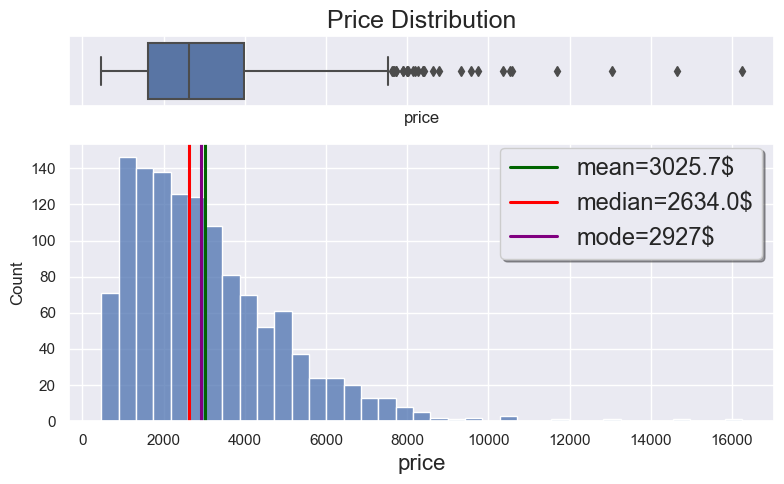

In [48]:
num_plot(df, 'price', 'Price Distribution','$')

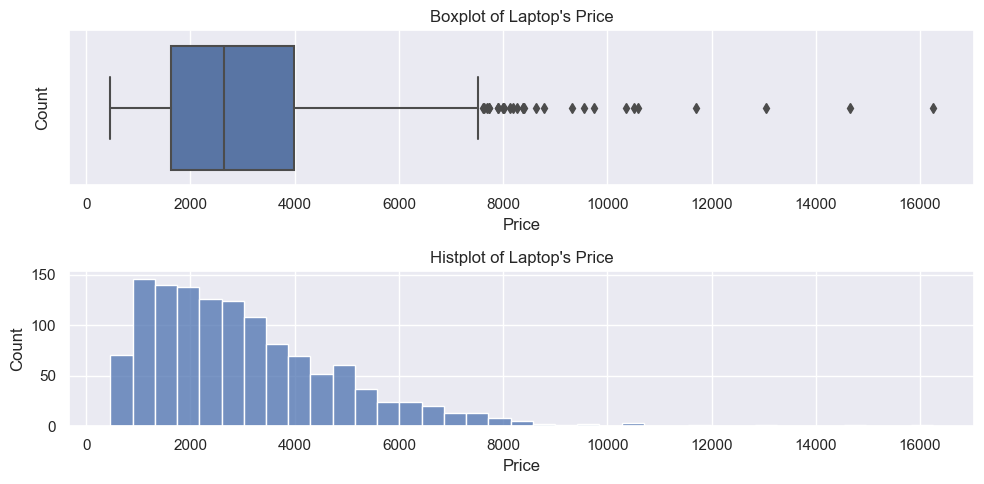

In [49]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

sns.boxplot(x="price", data=df, ax = ax1)
ax1.set_title("Boxplot of Laptop's Price")
ax1.set_xlabel("Price")
ax1.set_ylabel("Count")

sns.histplot(x="price", data=df, ax = ax2)
ax2.set_title("Histplot of Laptop's Price")
ax2.set_xlabel("Price")
ax2.set_ylabel("Count")


plt.tight_layout()


plt.show()

In [50]:
q3 = df.price.quantile(0.75)
q1 = df.price.quantile(0.25)
iqr = q3 - q1
iqr

2368.0

In [51]:
high_limit = q3 + 1.5 * iqr
high_limit

7542.0

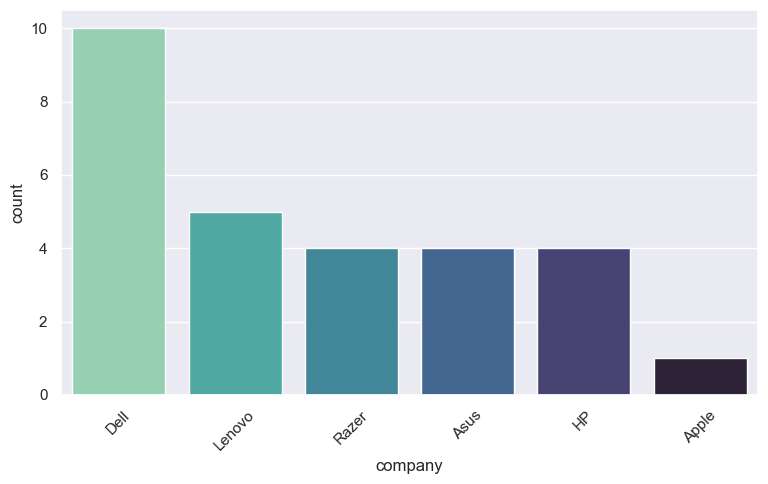

In [52]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.countplot(x='company', data = df[df.price > 7542], palette='mako_r', 
              order = df[df.price > 7542]['company'].value_counts().index)
plt.xticks(rotation=45);

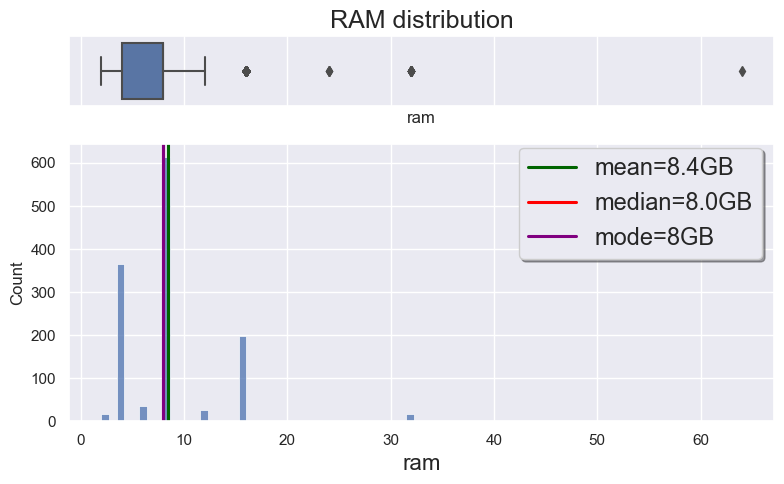

In [53]:
num_plot(df, 'ram','RAM distribution','GB')

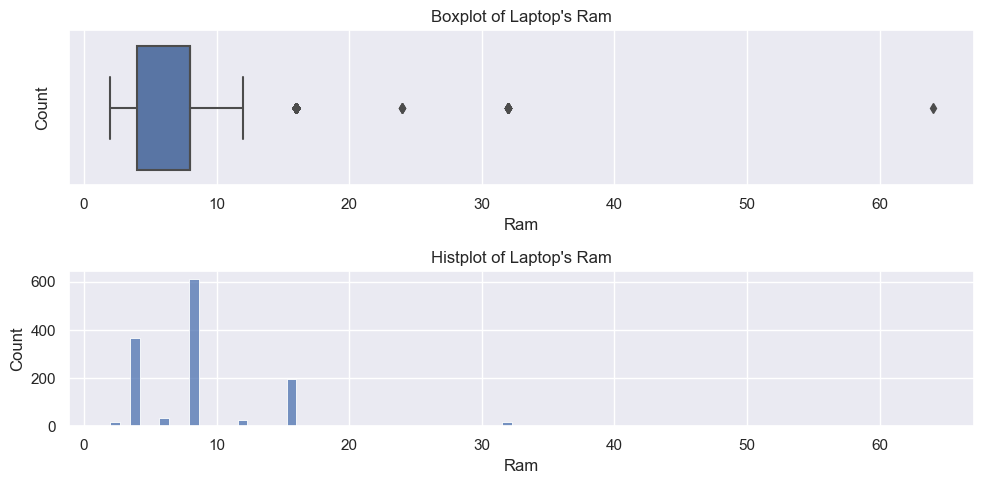

In [54]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

sns.boxplot(x="ram", data=df, ax = ax1)
ax1.set_title("Boxplot of Laptop's Ram")
ax1.set_xlabel("Ram")
ax1.set_ylabel("Count")

sns.histplot(x="ram", data=df, ax = ax2)
ax2.set_title("Histplot of Laptop's Ram")
ax2.set_xlabel("Ram")
ax2.set_ylabel("Count")


plt.tight_layout()


plt.show()

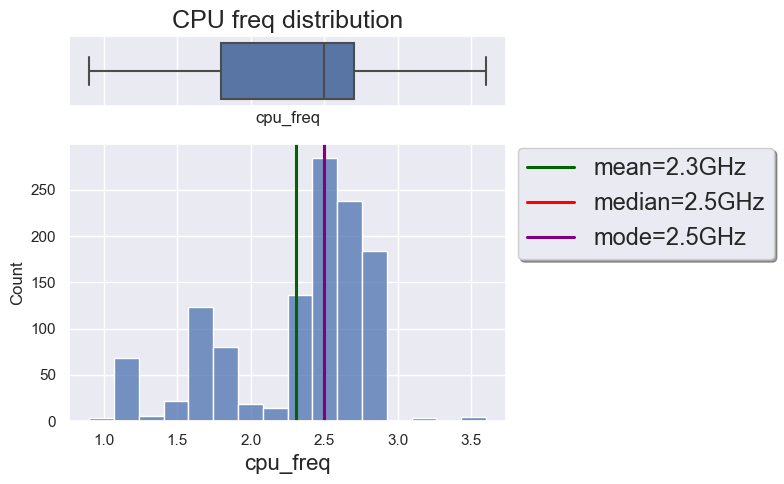

In [55]:
num_plot(df, 'cpu_freq','CPU freq distribution','GHz')

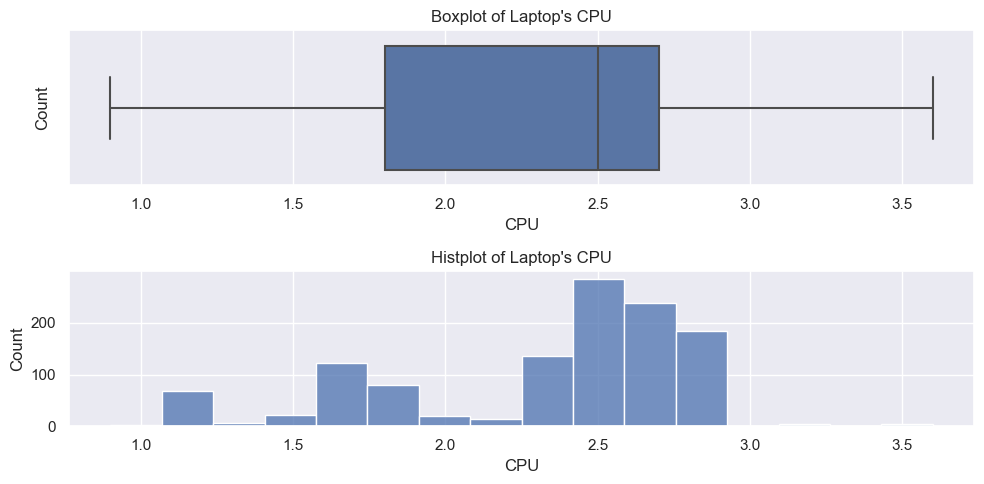

In [56]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

sns.boxplot(x="cpu_freq", data=df, ax = ax1)
ax1.set_title("Boxplot of Laptop's CPU")
ax1.set_xlabel("CPU")
ax1.set_ylabel("Count")

sns.histplot(x="cpu_freq", data=df, ax = ax2)
ax2.set_title("Histplot of Laptop's CPU")
ax2.set_xlabel("CPU")
ax2.set_ylabel("Count")


plt.tight_layout()


plt.show()

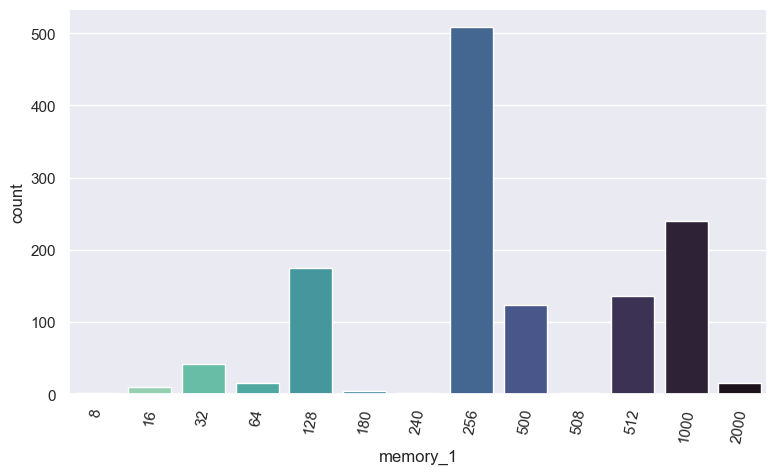

In [57]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.countplot(x='memory_1', data = df, palette='mako_r', 
              order = df.memory_1.value_counts().sort_index().index)
plt.xticks(rotation=80);

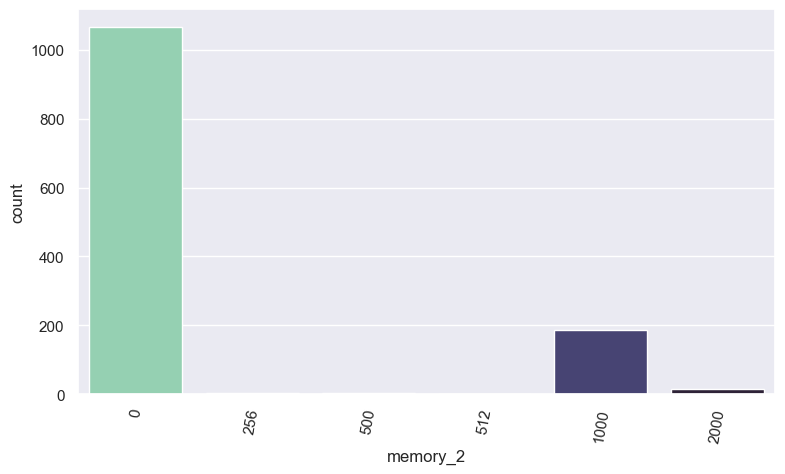

In [58]:
fig, ax = plt.subplots(figsize = (9, 5))
sns.countplot(x='memory_2', data = df, palette='mako_r', 
              order = df.memory_2.value_counts().sort_index().index)
plt.xticks(rotation=80);

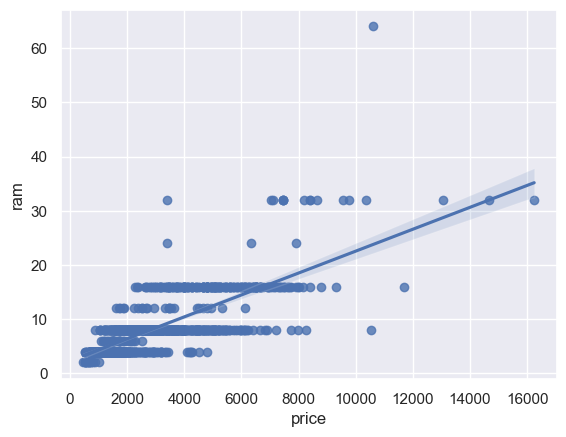

In [59]:
sns.regplot(x = "price", y = "ram", data = df);

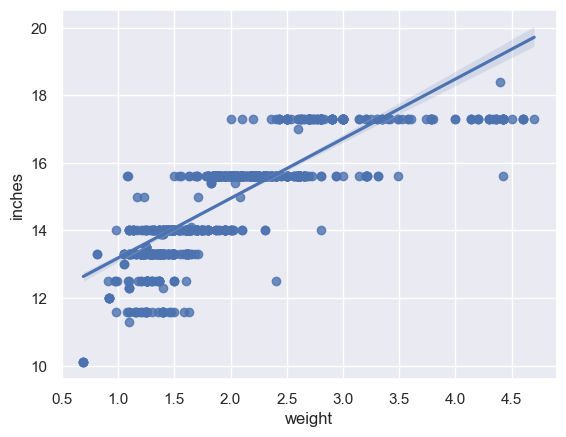

In [60]:
sns.regplot(x = "weight", y = "inches", data = df);

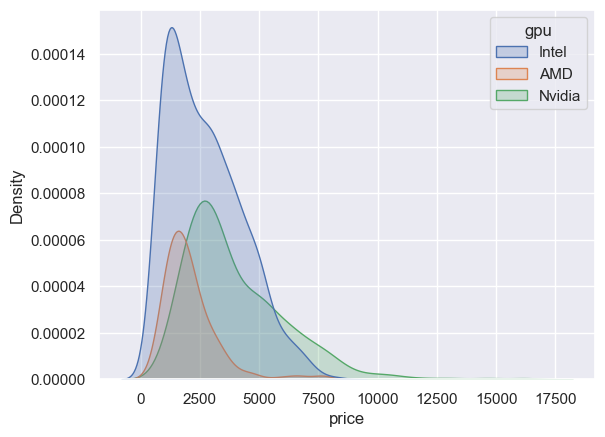

In [61]:
sns.kdeplot(data = df, x = "price", hue = "gpu", shade = True);

In [62]:
gpu_list = df["cpu"].value_counts()[:15].index.tolist()
gpu_list

['Intel Core i5 7200U ',
 'Intel Core i7 7700HQ ',
 'Intel Core i7 7500U ',
 'Intel Core i7 8550U ',
 'Intel Core i5 8250U ',
 'Intel Core i5 6200U ',
 'Intel Core i3 6006U 2GHz',
 'Intel Core i7 6500U ',
 'Intel Core i7 6700HQ ',
 'Intel Core i3 7100U ',
 'Intel Core i5 7300HQ ',
 'Intel Celeron Dual Core N3350 ',
 'Intel Celeron Dual Core N3060 ',
 'Intel Core i7 6600U ',
 'Intel Core i3 6006U ']

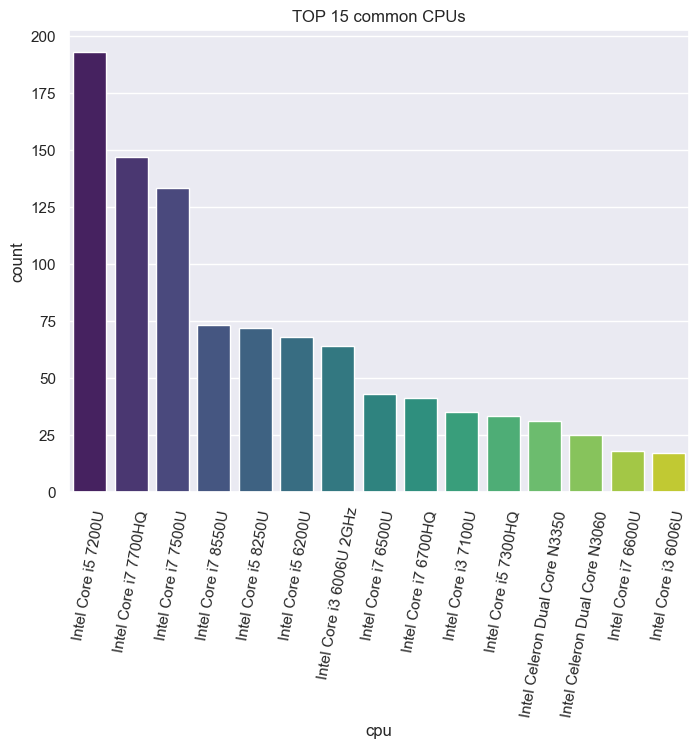

In [63]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x = "cpu", data = df[df["cpu"].isin(gpu_list)], order = gpu_list, palette='viridis')
plt.xticks(rotation=80);
plt.title('TOP 15 common CPUs')
plt.show()

In [64]:
company_list = df['company'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'MSI', 'Toshiba', 'Apple']

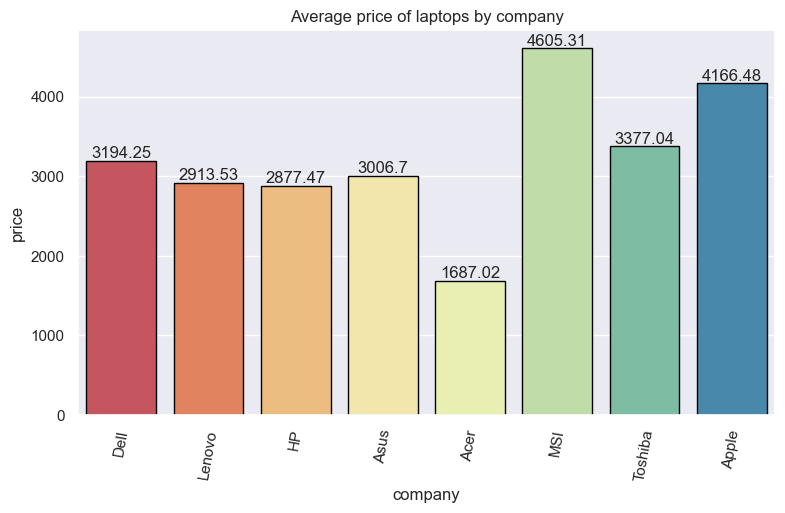

In [65]:
plt.figure(figsize=(9,5))
ax=sns.barplot(x='company', y='price', data=df[df['company'].isin(company_list)],
                order=company_list, 
                palette='Spectral', ci = False, 
                edgecolor="black")
plt.xticks(rotation=80);
plt.title('Average price of laptops by company')
ax.bar_label(ax.containers[0])
plt.show()

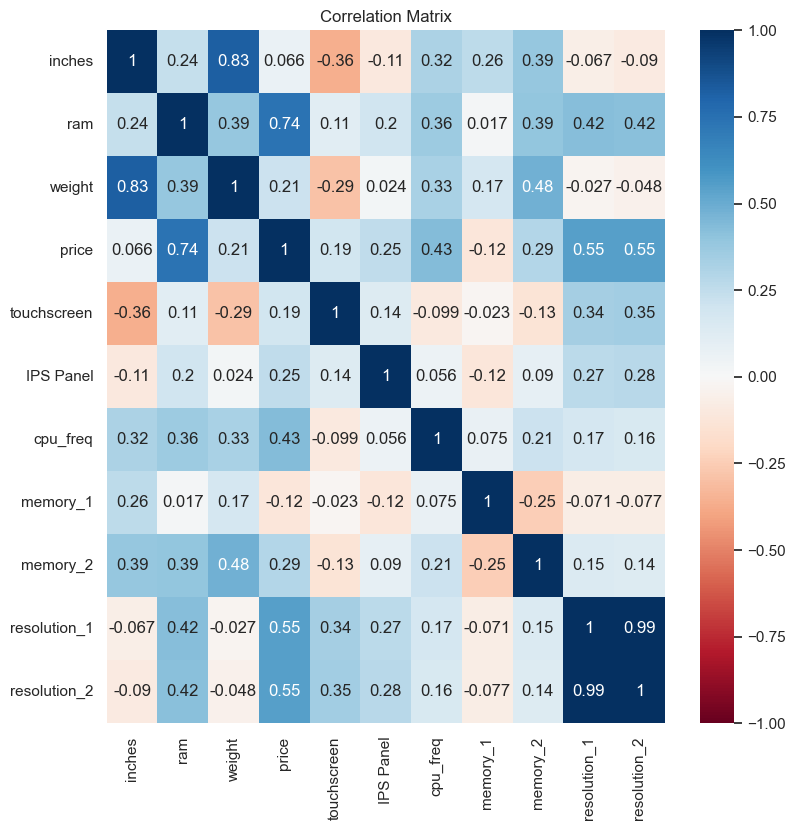

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()